# 燃料电池数据处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
T=30
P=101700
P_0=101325
F=9.65e4
I_电解=300

In [3]:
table1=pd.read_csv("燃料电池表一.csv")
table1["电量It（c）"] = table1["输入电流I（A）"] * table1["时间t（s）"]
table1["氢气产生量理论值"] = ( (273.16+T)/273.16 ) * (P_0/P) * ( table1["电量It（c）"]/(2*F) ) * 22.4
table1

,输入电流I（A）,输入电压V（V）,时间t（s）,电量It（c）,氢气产生量测量值（L）,氢气产生量理论值
0,0.1,2.12,318,31.8,0.0040,0.004081
1,0.2,2.27,221,44.2,0.0060,0.005672
2,0.3,2.45,106,31.8,0.0045,0.004081


In [4]:
table2=pd.read_csv("燃料电池表二.csv")
table2["功率（mW）"]=table2["输出电流I（mA）"]*table2["输出电压U（V）"]
table2

,输出电压U（V）,输出电流I（mA）,功率（mW）
0,0.86,0.9,0.774
1,0.80,4.5,3.600
2,0.75,18.1,13.575
3,0.70,40.8,28.560
4,0.65,63.4,41.210
5,0.60,86.6,51.960
6,0.55,110.8,60.940
7,0.50,130.2,65.100
8,0.45,150.1,67.545
9,0.40,166.5,66.600


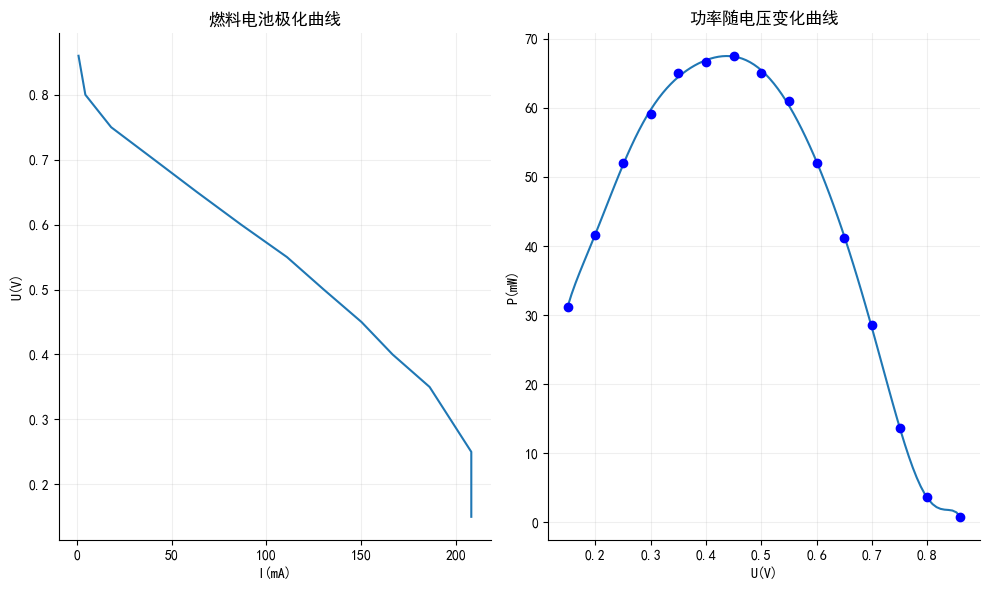

In [27]:
fig, axs = plt.subplots(1,2,figsize=(10, 6))
#曲线1
axs[0].set_title('燃料电池极化曲线')

axs[0].plot(table2["输出电流I（mA）"],table2["输出电压U（V）"])

axs[0].set_ylabel('U(V)')
axs[0].set_xlabel('I(mA)')
axs[0].spines[["top", "right"]].set_visible(False)

#曲线2
axs[1].set_title('功率随电压变化曲线')
fit2=np.polyfit(table2["输出电压U（V）"],table2["功率（mW）"],10)
fit2_fn=np.poly1d(fit2)
axs[1].plot(np.linspace(0.15,0.86,100),fit2_fn(np.linspace(0.15,0.86,100)))
axs[1].plot(table2["输出电压U（V）"],table2["功率（mW）"],'bo')

axs[1].set_ylabel('P(mW)')
axs[1].set_xlabel('U(V)')
axs[1].spines[["top", "right"]].set_visible(False)

axs[0].grid(alpha=0.2)
axs[1].grid(alpha=0.2)
plt.tight_layout()

In [7]:
P_max = table2["功率（mW）"].max()
n=P_max/(1.48*I_电解)*100
print(f"最大输出功率{P_max},对应效率{n}%")

最大输出功率67.545,对应效率15.212837837837839%
